# 贪心算法解决TSP问题：北京大学校园路径规划

该Notebook实现了基于贪心算法的旅行商问题(TSP)解决方案，包括：

1. **最近邻贪心算法**：每次选择离当前位置最近的未访问城市
2. **改进贪心算法**：加入一些启发式优化
3. **可视化展示**：展示最终路径和结果
4. **性能对比**：与随机路径进行对比分析

## 1. 环境设置与数据配置

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import time
from itertools import permutations

# Matplotlib 中文显示设置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 地图文件路径
MAP_IMAGE_PATH = 'map_1.0.jpg'

# 北京大学地点坐标
CITIES = {
    "West Gate": (703, 595),
    "Weiming Lake": (1069, 630), 
    "Jing Yuan": (928, 830),
    "Boya Tower": (1148, 646),
    "Statue of the Former Principal Cai Yuanpei": (885, 632),
    "Zhibeizi Garden": (1320, 1052),
    "YANNANYUAN": (969, 991),
    "May 4th Playground": (1251, 1147),
    "University Library": (1083, 816),
    "Stone Fish": (959, 632),
    "Tomb of Mr. Edgar Snow": (1070, 730),
    "Marble Boat": (1040, 571),
    "Luce Pavilion": (1012, 582),
    "Tian Yuan": (1314, 670),
    "MINGHE YUAN": (733, 518),
    "Campus Scenery Pavilion": (840, 470),
    "LANGRUN YUAN": (1134, 271),
    "JINGCHUN YUAN": (945, 455),
    "Lotus Pond": (750, 432),
    "SHAO HAI": (736, 742),
    "Catering Building": (939, 1111),
    "Humanities Garden": (1155, 433),
    "Statue of Professor Li Dazhao": (926, 738),
    "Museum of University History": (785,713),
    "University Hall": (1098, 992),
    "North Shore": (1049, 519),
    "The Bridge of Magpies": (993, 559),
    "Silent Wall": (1118, 503),
    "Fountain": (878, 1062),
    "Red Lake": (864, 419),
    "The Institute of Poetry Studies": (993, 358),
    "Tan Siu Lin Center for International Studies": (1080, 697)
}

print(f"北京大学地点总数: {len(CITIES)}")
print("地点列表:")
for i, (name, coord) in enumerate(CITIES.items(), 1):
    print(f"{i:2d}. {name:<40} {coord}")

北京大学地点总数: 32
地点列表:
 1. West Gate                                (703, 595)
 2. Weiming Lake                             (1069, 630)
 3. Jing Yuan                                (928, 830)
 4. Boya Tower                               (1148, 646)
 5. Statue of the Former Principal Cai Yuanpei (885, 632)
 6. Zhibeizi Garden                          (1320, 1052)
 7. YANNANYUAN                               (969, 991)
 8. May 4th Playground                       (1251, 1147)
 9. University Library                       (1083, 816)
10. Stone Fish                               (959, 632)
11. Tomb of Mr. Edgar Snow                   (1070, 730)
12. Marble Boat                              (1040, 571)
13. Luce Pavilion                            (1012, 582)
14. Tian Yuan                                (1314, 670)
15. MINGHE YUAN                              (733, 518)
16. Campus Scenery Pavilion                  (840, 470)
17. LANGRUN YUAN                             (1134, 271)
18. JINGCHUN YU

## 2. 贪心算法实现

In [2]:
class GreedyTSP:
    def __init__(self, cities):
        self.cities = cities
        self.city_names = list(cities.keys())
        self.city_coords = np.array(list(cities.values()))
        self.num_cities = len(cities)
        
        # 计算距离矩阵
        self.distance_matrix = self._calculate_distance_matrix()
        
    def _calculate_distance_matrix(self):
        """计算城市间的欧几里得距离矩阵"""
        distances = np.zeros((self.num_cities, self.num_cities))
        for i in range(self.num_cities):
            for j in range(self.num_cities):
                if i != j:
                    coord1 = self.city_coords[i]
                    coord2 = self.city_coords[j]
                    distances[i][j] = np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)
        return distances
    
    def calculate_path_distance(self, path):
        """计算给定路径的总距离"""
        total_distance = 0
        for i in range(len(path)):
            current_city = path[i]
            next_city = path[(i + 1) % len(path)]  # 回到起点
            total_distance += self.distance_matrix[current_city][next_city]
        return total_distance
    
    def nearest_neighbor_greedy(self, start_city=0):
        """最近邻贪心算法"""
        print(f"\n=== 最近邻贪心算法 ===")
        print(f"起始城市: {self.city_names[start_city]}")
        
        start_time = time.time()
        
        path = [start_city]
        unvisited = set(range(self.num_cities)) - {start_city}
        current_city = start_city
        
        step = 1
        while unvisited:
            # 找到最近的未访问城市
            nearest_city = min(unvisited, key=lambda city: self.distance_matrix[current_city][city])
            nearest_distance = self.distance_matrix[current_city][nearest_city]
            
            print(f"步骤 {step:2d}: {self.city_names[current_city]:<35} -> {self.city_names[nearest_city]:<35} (距离: {nearest_distance:.2f})")
            
            path.append(nearest_city)
            unvisited.remove(nearest_city)
            current_city = nearest_city
            step += 1
        
        # 计算回到起点的距离
        return_distance = self.distance_matrix[current_city][start_city]
        print(f"步骤 {step:2d}: {self.city_names[current_city]:<35} -> {self.city_names[start_city]:<35} (距离: {return_distance:.2f}) [回到起点]")
        
        total_distance = self.calculate_path_distance(path)
        execution_time = time.time() - start_time
        
        print(f"\n算法执行时间: {execution_time:.4f} 秒")
        print(f"总路径距离: {total_distance:.2f}")
        
        return path, total_distance
    
    def improved_greedy(self, start_city=0, lookahead=2):
        """改进贪心算法：考虑前瞻步数"""
        print(f"\n=== 改进贪心算法 (前瞻步数: {lookahead}) ===")
        print(f"起始城市: {self.city_names[start_city]}")
        
        start_time = time.time()
        
        path = [start_city]
        unvisited = set(range(self.num_cities)) - {start_city}
        current_city = start_city
        
        step = 1
        while unvisited:
            if len(unvisited) <= lookahead:
                # 如果剩余城市数量少于等于前瞻步数，使用简单最近邻
                next_city = min(unvisited, key=lambda city: self.distance_matrix[current_city][city])
            else:
                # 考虑前瞻的贪心选择
                best_next_city = None
                best_total_cost = float('inf')
                
                for candidate_city in unvisited:
                    # 计算到候选城市的直接距离
                    direct_cost = self.distance_matrix[current_city][candidate_city]
                    
                    # 计算从候选城市到其他未访问城市的最近距离之和（前瞻）
                    remaining_cities = unvisited - {candidate_city}
                    if remaining_cities:
                        lookahead_cost = sum(min(self.distance_matrix[candidate_city][city] for city in remaining_cities) 
                                           for _ in range(min(lookahead, len(remaining_cities))))
                    else:
                        lookahead_cost = 0
                    
                    total_cost = direct_cost + lookahead_cost * 0.3  # 给前瞻成本较小权重
                    
                    if total_cost < best_total_cost:
                        best_total_cost = total_cost
                        best_next_city = candidate_city
                
                next_city = best_next_city
            
            next_distance = self.distance_matrix[current_city][next_city]
            print(f"步骤 {step:2d}: {self.city_names[current_city]:<35} -> {self.city_names[next_city]:<35} (距离: {next_distance:.2f})")
            
            path.append(next_city)
            unvisited.remove(next_city)
            current_city = next_city
            step += 1
        
        # 计算回到起点的距离
        return_distance = self.distance_matrix[current_city][start_city]
        print(f"步骤 {step:2d}: {self.city_names[current_city]:<35} -> {self.city_names[start_city]:<35} (距离: {return_distance:.2f}) [回到起点]")
        
        total_distance = self.calculate_path_distance(path)
        execution_time = time.time() - start_time
        
        print(f"\n算法执行时间: {execution_time:.4f} 秒")
        print(f"总路径距离: {total_distance:.2f}")
        
        return path, total_distance
    
    def random_path(self, start_city=0):
        """生成随机路径作为对比"""
        cities = list(range(self.num_cities))
        cities.remove(start_city)
        random.shuffle(cities)
        path = [start_city] + cities
        total_distance = self.calculate_path_distance(path)
        return path, total_distance

# 创建TSP求解器实例
tsp_solver = GreedyTSP(CITIES)
print("TSP求解器初始化完成！")
print(f"距离矩阵大小: {tsp_solver.distance_matrix.shape}")

TSP求解器初始化完成！
距离矩阵大小: (32, 32)


## 3. 运行贪心算法

In [3]:
# 选择起始点 (West Gate)
start_city_name = "West Gate"
start_city_index = tsp_solver.city_names.index(start_city_name)

print(f"选择起始地点: {start_city_name} (索引: {start_city_index})")
print("="*100)

# 1. 运行最近邻贪心算法
greedy_path, greedy_distance = tsp_solver.nearest_neighbor_greedy(start_city_index)

print("\n" + "="*100)

# 2. 运行改进贪心算法
improved_path, improved_distance = tsp_solver.improved_greedy(start_city_index, lookahead=3)

print("\n" + "="*100)

# 3. 生成随机路径作为对比
print("\n=== 随机路径对比 ===")
random_paths = []
random_distances = []

for i in range(5):
    rand_path, rand_distance = tsp_solver.random_path(start_city_index)
    random_paths.append(rand_path)
    random_distances.append(rand_distance)
    print(f"随机路径 {i+1}: 距离 = {rand_distance:.2f}")

avg_random_distance = np.mean(random_distances)
best_random_distance = min(random_distances)

print(f"\n随机路径统计:")
print(f"  平均距离: {avg_random_distance:.2f}")
print(f"  最佳距离: {best_random_distance:.2f}")

print("\n" + "="*100)
print("🏆 算法性能对比")
print("="*100)
print(f"最近邻贪心算法:     {greedy_distance:.2f}")
print(f"改进贪心算法:       {improved_distance:.2f}")
print(f"随机路径平均:       {avg_random_distance:.2f}")
print(f"随机路径最佳:       {best_random_distance:.2f}")

print(f"\n📊 性能提升:")
greedy_improvement = (avg_random_distance - greedy_distance) / avg_random_distance * 100
improved_improvement = (avg_random_distance - improved_distance) / avg_random_distance * 100
print(f"最近邻贪心 vs 随机: {greedy_improvement:.1f}% 改善")
print(f"改进贪心 vs 随机:   {improved_improvement:.1f}% 改善")

if improved_distance < greedy_distance:
    additional_improvement = (greedy_distance - improved_distance) / greedy_distance * 100
    print(f"改进贪心 vs 最近邻: {additional_improvement:.1f}% 额外改善")
else:
    print(f"改进贪心未能超越最近邻贪心")

选择起始地点: West Gate (索引: 0)

=== 最近邻贪心算法 ===
起始城市: West Gate
步骤  1: West Gate                           -> MINGHE YUAN                         (距离: 82.64)
步骤  2: MINGHE YUAN                         -> Lotus Pond                          (距离: 87.66)
步骤  3: Lotus Pond                          -> Campus Scenery Pavilion             (距离: 97.69)
步骤  4: Campus Scenery Pavilion             -> Red Lake                            (距离: 56.36)
步骤  5: Red Lake                            -> JINGCHUN YUAN                       (距离: 88.64)
步骤  6: JINGCHUN YUAN                       -> The Institute of Poetry Studies     (距离: 108.23)
步骤  7: The Institute of Poetry Studies     -> LANGRUN YUAN                        (距离: 165.68)
步骤  8: LANGRUN YUAN                        -> Humanities Garden                   (距离: 163.36)
步骤  9: Humanities Garden                   -> Silent Wall                         (距离: 79.18)
步骤 10: Silent Wall                         -> North Shore                         (距离: 70.83

## 4. 结果可视化

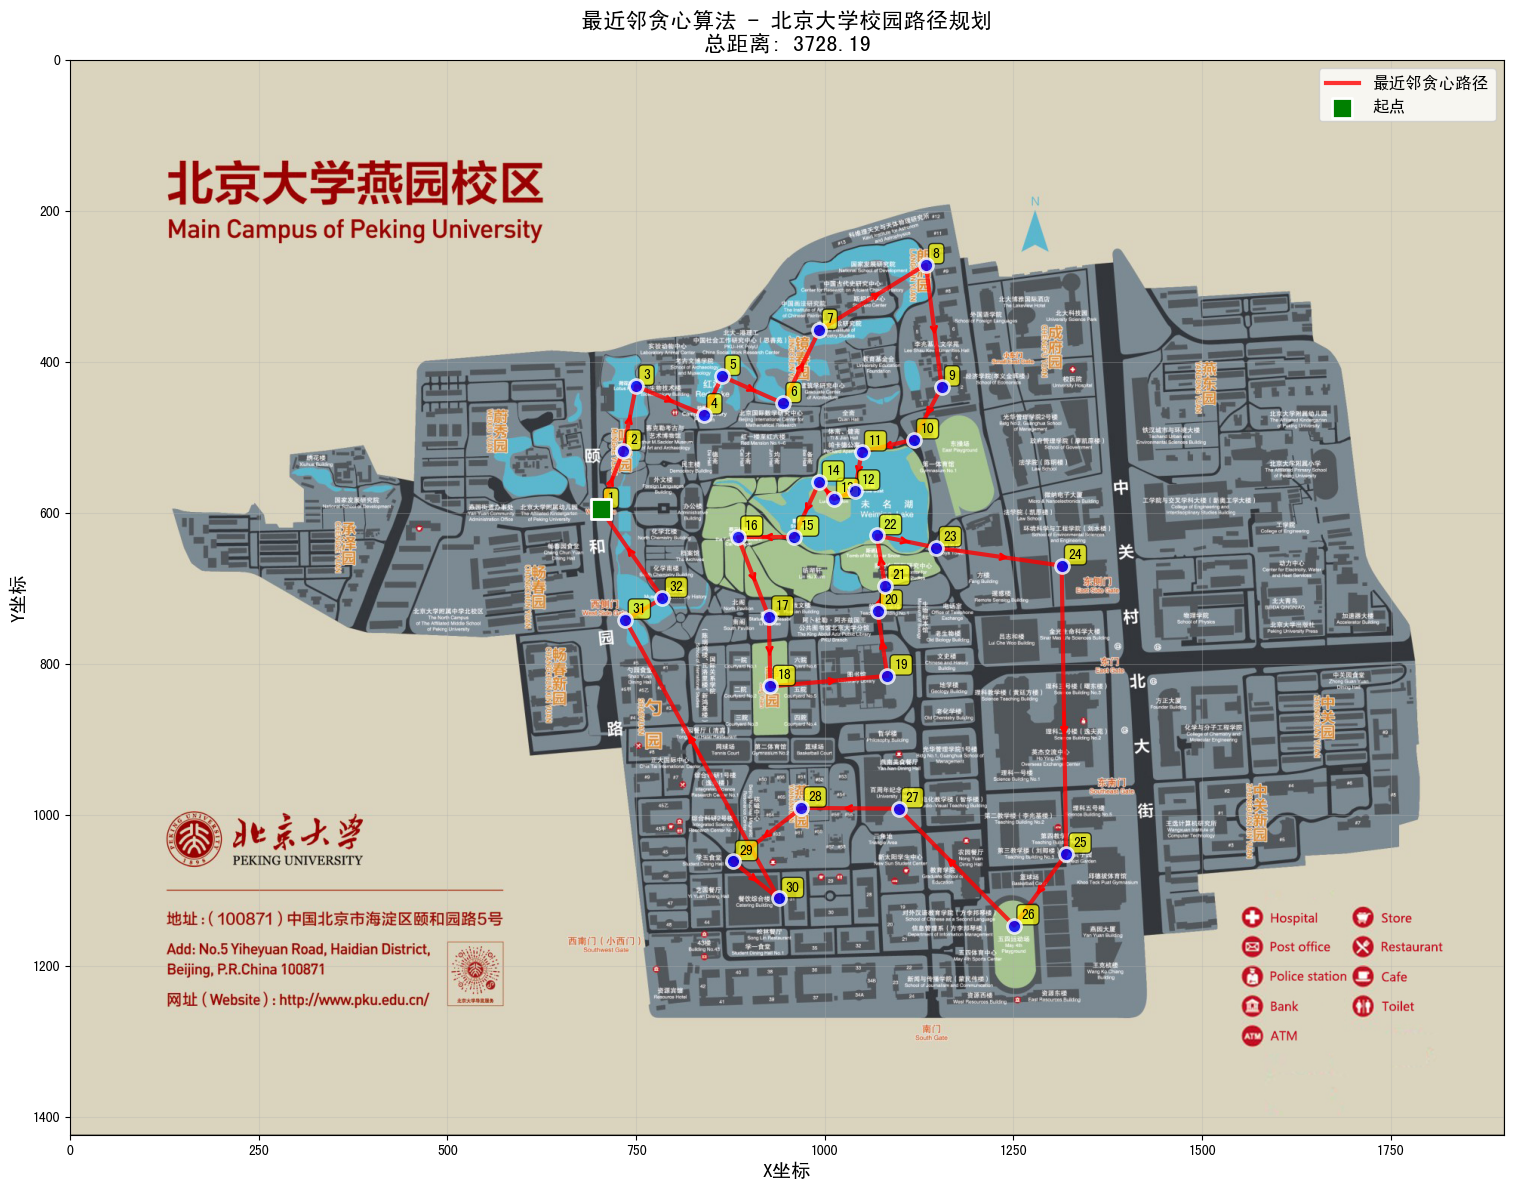

<Figure size 640x480 with 0 Axes>

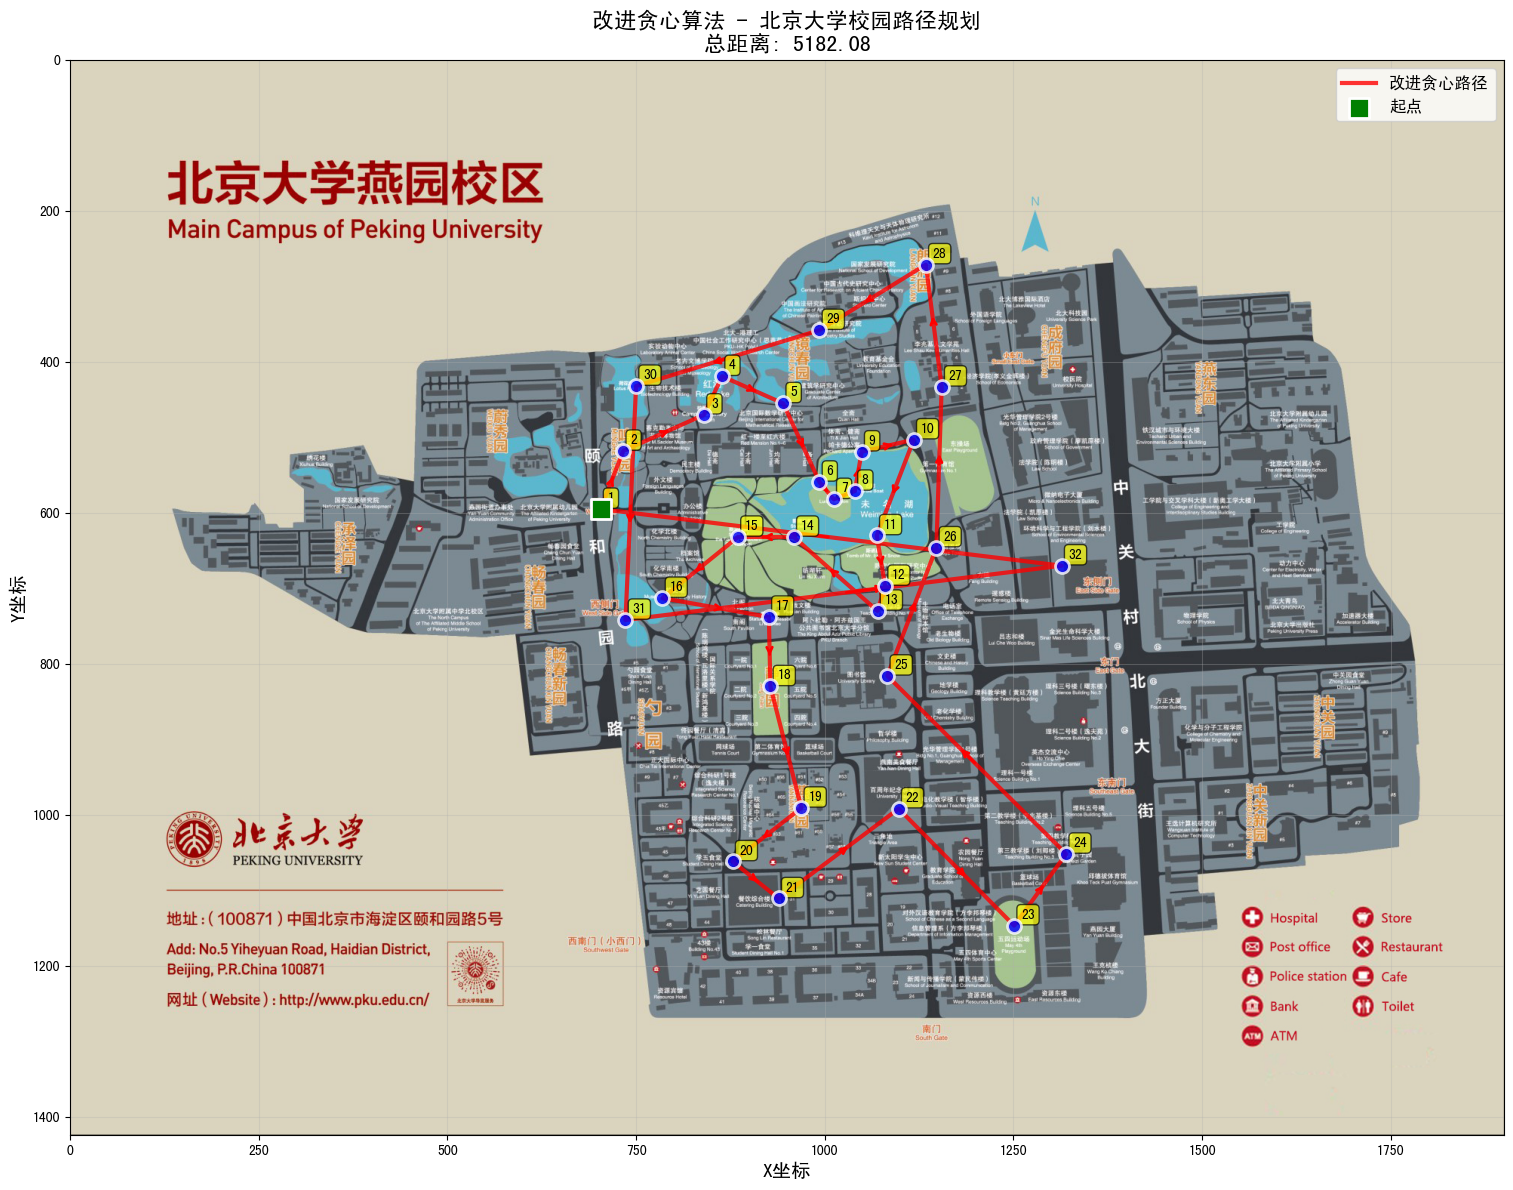

<Figure size 640x480 with 0 Axes>

In [4]:
def plot_tsp_result(tsp_solver, path, distance, title, algorithm_name):
    """绘制TSP结果"""
    plt.figure(figsize=(16, 12))
    
    # 绘制地图背景
    try:
        campus_map = mpimg.imread(MAP_IMAGE_PATH)
        plt.imshow(campus_map, extent=[0, campus_map.shape[1], campus_map.shape[0], 0])
    except FileNotFoundError:
        print(f"警告: 地图文件 '{MAP_IMAGE_PATH}' 未找到")
        plt.xlim(0, 1500)
        plt.ylim(0, 1200)
        plt.gca().invert_yaxis()
    
    # 绘制路径
    path_coords = tsp_solver.city_coords[path + [path[0]]]  # 添加回到起点
    plt.plot(path_coords[:, 0], path_coords[:, 1], 'r-', linewidth=3, alpha=0.8, label=f'{algorithm_name}路径')
    
    # 绘制路径方向箭头
    for i in range(len(path)):
        current_pos = tsp_solver.city_coords[path[i]]
        next_pos = tsp_solver.city_coords[path[(i + 1) % len(path)]]
        
        # 计算箭头方向
        dx = next_pos[0] - current_pos[0]
        dy = next_pos[1] - current_pos[1]
        
        # 在路径中点添加箭头
        mid_x = current_pos[0] + dx * 0.5
        mid_y = current_pos[1] + dy * 0.5
        
        plt.annotate('', xy=(mid_x + dx*0.1, mid_y + dy*0.1), xytext=(mid_x, mid_y),
                    arrowprops=dict(arrowstyle='->', color='red', lw=2))
    
    # 绘制城市点
    plt.scatter(tsp_solver.city_coords[:, 0], tsp_solver.city_coords[:, 1], 
               c='blue', s=100, zorder=5, alpha=0.8, edgecolors='white', linewidth=2)
    
    # 突出显示起点
    start_coord = tsp_solver.city_coords[path[0]]
    plt.scatter(start_coord[0], start_coord[1], c='green', s=200, marker='s', 
               zorder=6, label='起点', edgecolors='white', linewidth=2)
    
    # 添加城市编号
    for i, (city_idx, coord) in enumerate(zip(path, tsp_solver.city_coords[path])):
        plt.annotate(f'{i+1}', (coord[0], coord[1]), xytext=(5, 5), 
                    textcoords='offset points', fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    plt.title(f'{title}\n总距离: {distance:.2f}', fontsize=16, fontweight='bold')
    plt.xlabel('X坐标', fontsize=14)
    plt.ylabel('Y坐标', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return plt.gcf()

# 绘制最近邻贪心算法结果
fig1 = plot_tsp_result(tsp_solver, greedy_path, greedy_distance, 
                      '最近邻贪心算法 - 北京大学校园路径规划', '最近邻贪心')

# 绘制改进贪心算法结果
fig2 = plot_tsp_result(tsp_solver, improved_path, improved_distance, 
                      '改进贪心算法 - 北京大学校园路径规划', '改进贪心')

## 5. 详细路径分析

In [5]:
def print_detailed_path_analysis(tsp_solver, path, distance, algorithm_name):
    """打印详细的路径分析"""
    print(f"\n{'='*80}")
    print(f"🔍 {algorithm_name} - 详细路径分析")
    print(f"{'='*80}")
    
    print(f"\n📍 完整访问路径:")
    total_segments = len(path)
    cumulative_distance = 0
    
    for i in range(total_segments):
        current_city = path[i]
        next_city = path[(i + 1) % total_segments]  # 回到起点
        
        current_name = tsp_solver.city_names[current_city]
        next_name = tsp_solver.city_names[next_city]
        
        segment_distance = tsp_solver.distance_matrix[current_city][next_city]
        cumulative_distance += segment_distance
        
        status = "[回到起点]" if i == total_segments - 1 else ""
        print(f"{i+1:2d}. {current_name:<40} -> {next_name:<40} "
              f"距离: {segment_distance:7.2f} | 累计: {cumulative_distance:8.2f} {status}")
    
    print(f"\n📊 统计信息:")
    segments_distances = [tsp_solver.distance_matrix[path[i]][path[(i+1) % len(path)]] 
                         for i in range(len(path))]
    
    print(f"   总访问地点数: {len(path)}")
    print(f"   总路径距离: {distance:.2f}")
    print(f"   平均段距离: {np.mean(segments_distances):.2f}")
    print(f"   最长段距离: {np.max(segments_distances):.2f}")
    print(f"   最短段距离: {np.min(segments_distances):.2f}")
    print(f"   距离标准差: {np.std(segments_distances):.2f}")
    
    # 找出最长和最短的路径段
    max_segment_idx = np.argmax(segments_distances)
    min_segment_idx = np.argmin(segments_distances)
    
    print(f"\n🔗 路径段分析:")
    print(f"   最长路径段: {tsp_solver.city_names[path[max_segment_idx]]} -> "
          f"{tsp_solver.city_names[path[(max_segment_idx+1) % len(path)]]} ({segments_distances[max_segment_idx]:.2f})")
    print(f"   最短路径段: {tsp_solver.city_names[path[min_segment_idx]]} -> "
          f"{tsp_solver.city_names[path[(min_segment_idx+1) % len(path)]]} ({segments_distances[min_segment_idx]:.2f})")

# 分析最近邻贪心算法结果
print_detailed_path_analysis(tsp_solver, greedy_path, greedy_distance, "最近邻贪心算法")

# 分析改进贪心算法结果  
print_detailed_path_analysis(tsp_solver, improved_path, improved_distance, "改进贪心算法")


🔍 最近邻贪心算法 - 详细路径分析

📍 完整访问路径:
 1. West Gate                                -> MINGHE YUAN                              距离:   82.64 | 累计:    82.64 
 2. MINGHE YUAN                              -> Lotus Pond                               距离:   87.66 | 累计:   170.30 
 3. Lotus Pond                               -> Campus Scenery Pavilion                  距离:   97.69 | 累计:   268.00 
 4. Campus Scenery Pavilion                  -> Red Lake                                 距离:   56.36 | 累计:   324.36 
 5. Red Lake                                 -> JINGCHUN YUAN                            距离:   88.64 | 累计:   413.00 
 6. JINGCHUN YUAN                            -> The Institute of Poetry Studies          距离:  108.23 | 累计:   521.23 
 7. The Institute of Poetry Studies          -> LANGRUN YUAN                             距离:  165.68 | 累计:   686.91 
 8. LANGRUN YUAN                             -> Humanities Garden                        距离:  163.36 | 累计:   850.26 
 9. Humanities Garden            

## 6. 算法性能对比与总结

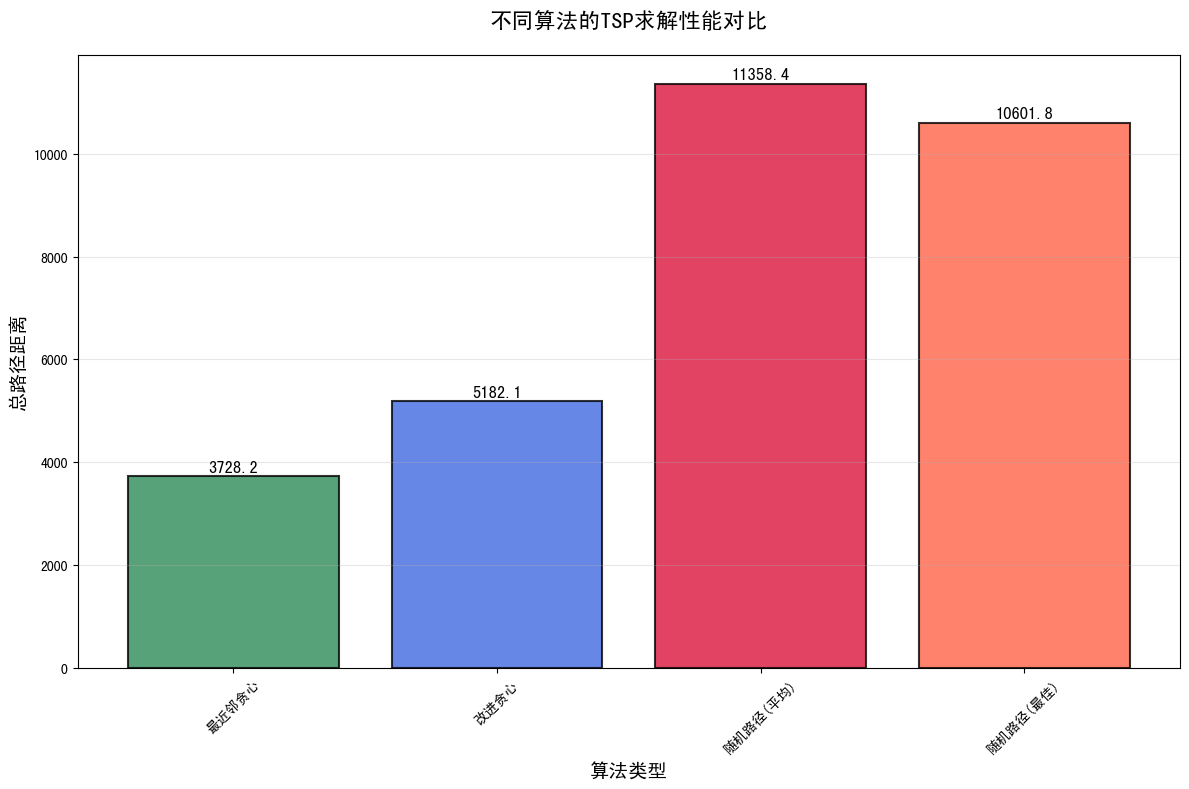


🎯 贪心算法TSP求解 - 最终总结

🏛️ 问题规模:
   北京大学校园地点数: 32
   起始地点: West Gate
   问题复杂度: O(n!) = O(32!) ≈ 2.63e+35

🚀 算法性能:
   最近邻贪心算法: 3728.19 (时间复杂度: O(n²))
   改进贪心算法:   5182.08 (时间复杂度: O(n²))
   随机解平均性能: 11358.39

🏆 最优结果:
   最佳算法: 最近邻贪心
   最优距离: 3728.19
   相比随机解改善: 67.2%

💡 算法特点:
   ✓ 最近邻贪心: 简单直观，每步选择最近城市
   ✓ 改进贪心: 加入前瞻机制，避免局部最优陷阱
   ✓ 快速求解: 时间复杂度O(n²)，适合大规模问题
   ✗ 非最优解: 贪心策略无法保证全局最优

🎨 可视化输出:
   生成了详细的路径规划图
   包含路径方向、访问顺序、距离信息
   基于北京大学校园真实地图

程序执行完成！


/var/folders/53/0d8k5xdx1dl0jpxkb2t64s5h0000gn/T/ipykernel_42086/1994489963.py:33: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  print(f"   问题复杂度: O(n!) = O({len(CITIES)}!) ≈ {np.math.factorial(len(CITIES)):.2e}")


In [6]:
# 创建性能对比图
plt.figure(figsize=(12, 8))

# 算法名称和对应距离
algorithms = ['最近邻贪心', '改进贪心', '随机路径(平均)', '随机路径(最佳)']
distances = [greedy_distance, improved_distance, avg_random_distance, best_random_distance]
colors = ['#2E8B57', '#4169E1', '#DC143C', '#FF6347']

bars = plt.bar(algorithms, distances, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

# 在柱状图上添加数值标签
for bar, distance in zip(bars, distances):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{distance:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.title('不同算法的TSP求解性能对比', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('总路径距离', fontsize=14)
plt.xlabel('算法类型', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 打印最终总结
print("\n" + "="*100)
print("🎯 贪心算法TSP求解 - 最终总结")
print("="*100)

print(f"\n🏛️ 问题规模:")
print(f"   北京大学校园地点数: {len(CITIES)}")
print(f"   起始地点: {start_city_name}")
print(f"   问题复杂度: O(n!) = O({len(CITIES)}!) ≈ {np.math.factorial(len(CITIES)):.2e}")

print(f"\n🚀 算法性能:")
print(f"   最近邻贪心算法: {greedy_distance:.2f} (时间复杂度: O(n²))")
print(f"   改进贪心算法:   {improved_distance:.2f} (时间复杂度: O(n²))")
print(f"   随机解平均性能: {avg_random_distance:.2f}")

best_algorithm = "改进贪心" if improved_distance < greedy_distance else "最近邻贪心"
best_distance = min(improved_distance, greedy_distance)

print(f"\n🏆 最优结果:")
print(f"   最佳算法: {best_algorithm}")
print(f"   最优距离: {best_distance:.2f}")
print(f"   相比随机解改善: {(avg_random_distance - best_distance) / avg_random_distance * 100:.1f}%")

print(f"\n💡 算法特点:")
print(f"   ✓ 最近邻贪心: 简单直观，每步选择最近城市")
print(f"   ✓ 改进贪心: 加入前瞻机制，避免局部最优陷阱")
print(f"   ✓ 快速求解: 时间复杂度O(n²)，适合大规模问题")
print(f"   ✗ 非最优解: 贪心策略无法保证全局最优")

print(f"\n🎨 可视化输出:")
print(f"   生成了详细的路径规划图")
print(f"   包含路径方向、访问顺序、距离信息")
print(f"   基于北京大学校园真实地图")

print("\n" + "="*100)
print("程序执行完成！")